In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from google_drive_downloader import GoogleDriveDownloader as gdd
warnings.filterwarnings('ignore')

## Work

In [ ]:
gdd.download_file_from_google_drive(file_id='1m53GMGvefv99ZeTOuhjb5wLkTSwfMTCf', dest_path= '/dataset_57_hypothyroid.csv')

In [ ]:
df = pd.read_csv("/dataset_57_hypothyroid.csv")

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [ ]:
df.columns
#Column 'Class' is target variable

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [ ]:
df['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [ ]:
df.isna().sum()
# "?" means Nan I suppose

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [ ]:
df.replace({'?':np.NAN}, inplace = True)
df.isna().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TBG,3772,100.000000
T3,769,20.387063
T4U,387,10.259809
FTI,385,10.206787
TSH,369,9.782609
TT4,231,6.124072
sex,150,3.976670
age,1,0.026511
referral_source,0,0.000000
TBG_measured,0,0.000000


In [ ]:
#Drop column TBG because 100% of data is missing
df.drop('TBG', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3622 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [ ]:
#Get unique values from each column
for column in df.columns:
    listOfValues=set(df[column])
    print(column,": ",listOfValues)

age :  {nan, '21', '6', '40', '51', '27', '86', '48', '29', '31', '44', '45', '30', '64', '24', '61', '12', '54', '69', '34', '81', '47', '23', '65', '10', '43', '71', '72', '88', '32', '36', '75', '455', '22', '60', '20', '76', '89', '91', '13', '55', '68', '63', '38', '73', '85', '46', '33', '41', '59', '39', '14', '77', '82', '57', '35', '15', '94', '62', '49', '42', '16', '90', '4', '18', '28', '74', '52', '84', '87', '2', '37', '25', '7', '19', '67', '70', '79', '17', '26', '1', '56', '83', '11', '78', '58', '5', '93', '66', '80', '53', '92', '50', '8'}
sex :  {nan, 'F', 'M'}
on_thyroxine :  {'f', 't'}
query_on_thyroxine :  {'f', 't'}
on_antithyroid_medication :  {'f', 't'}
sick :  {'f', 't'}
pregnant :  {'f', 't'}
thyroid_surgery :  {'f', 't'}
I131_treatment :  {'f', 't'}
query_hypothyroid :  {'f', 't'}
query_hyperthyroid :  {'f', 't'}
lithium :  {'f', 't'}
goitre :  {'f', 't'}
tumor :  {'f', 't'}
hypopituitary :  {'f', 't'}
psych :  {'f', 't'}
TSH_measured :  {'t', 'f'}
TSH :  {

In [ ]:
#convert str numbers to float
numerical_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in numerical_features:
    df[col] = df[col].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [ ]:
df.replace({"t":1,"f":0, "y":1, "n":0, "negative":0, "compensated_hypothyroid": 1, "primary_hypothyroid":2,"secondary_hypothyroid":3, "F":1, "M":0}, inplace = True)

In [ ]:
df.dtypes

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
r

In [ ]:
#Use One-hot Encoding for this variable
df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [ ]:
referral_source = pd.get_dummies(df.referral_source, drop_first=True)
df = pd.concat([df, referral_source], axis=1)

In [ ]:
df.drop('referral_source', axis = 1, inplace = True)

In [ ]:
df.dtypes

age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
C

In [ ]:
#Filling missing values
df = df.interpolate(method = 'spline', order = 4)

In [ ]:
df.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
Class                        0
SVHC                         0
SVHD                         0
SVI                          0
other                        0
dtype: i

      Ok, we've prepared data filling missing values and encoding categorical features. Let's take a look at correaltion

In [ ]:
corr_val = abs(data[data.columns[0:]].corr()['Class'][:])
corr_val = corr_val.drop('Class')
corr_val = corr_val[corr_val > 0.10]
corr_val

TSH    0.495365
T3     0.208860
TT4    0.328965
FTI    0.336499
Name: Class, dtype: float64

This 4 variables have the highest correlation with target. I'll use them for prediction

Tsh


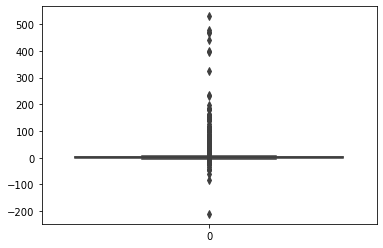

T3


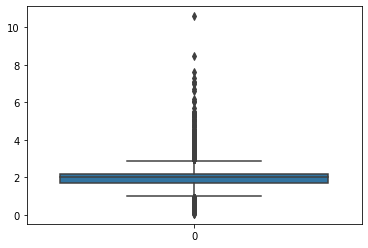

Tt4


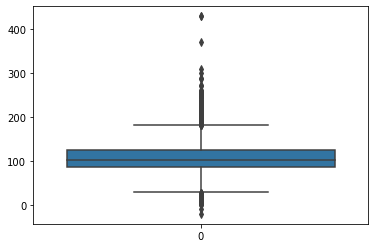

Fti


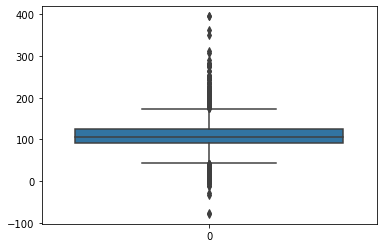

In [ ]:
for column in ['TSH','T3','TT4','FTI' ]:
    print(column.title())
    sns.boxplot(data = df[column])
    plt.show()

In [ ]:
X = df[['TSH', 'T3', 'TT4','FTI']]
y = df[['Class']]

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((3017, 4), (755, 4))

In [ ]:
Y_train.shape, Y_test.shape

((3017, 1), (755, 1))

In [ ]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = Logistic_model.predict(X_test)

In [ ]:
#There I made a dataset to make results easy to understand
result = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "FScore"])
pr, rc, fs, sup = metrics.precision_recall_fscore_support(Y_test, Y_pred, average='macro')
result = result.append({"Classifier": 'Logistic Regression',"Accuracy": round(metrics.accuracy_score(Y_test, Y_pred), 5),
                              "Precision": round(pr, 5), "Recall":round(rc, 5), "FScore":round(fs, 5)}, ignore_index=True)
result.set_index("Accuracy", inplace=True)

In [ ]:
result

,Classifier,Precision,Recall,FScore
Accuracy,,,,
0.93245,Logistic Regression,0.44902,0.39106,0.41271


In [ ]:
Neighbor_model = KNeighborsClassifier(3)
Neighbor_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
Y_predN = Neighbor_model.predict(X_test)

In [ ]:
res = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "FScore"])
pr, rc, fs, sup = metrics.precision_recall_fscore_support(Y_test, Y_predN, average='macro')
res = res.append({"Classifier": 'KNeighbors',"Accuracy": round(metrics.accuracy_score(Y_test, Y_predN), 5),
                              "Precision": round(pr, 5), "Recall":round(rc, 5), "FScore":round(fs, 5)}, ignore_index=True)
res.set_index("Accuracy", inplace=True)

In [ ]:
res

,Classifier,Precision,Recall,FScore
Accuracy,,,,
0.94305,KNeighbors,0.75381,0.73351,0.74338


  Ok, both models have high accuracy, but Logistic Regression has lower other parametrs than KNeighbors. I guess I can say that KNeighbors is more suitable model for this task. Maybe if I used different filling missing values method the results would be better

**That's it! Waiting for your comments. Have a fantastic day!**

## 1

In [ ]:
array = [1, 5, 7, 3, 7, 1, 3, 0, 5, 9]

In [ ]:
k = 3

In [ ]:

for i in range(k-1):
  for j in range(i + 1, k):
    if array[i] == array[j]:
      print(True)
return False

False
